importing Various Libraries

In [454]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level=logging.WARN)

import matplotlib.pyplot as plt
import seaborn as sns

import math

import mlflow
import mlflow.sklearn
from urllib.parse import urlparse
import re

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_regression,VarianceThreshold

Calling the dataframe

In [455]:
df = pd.read_csv("archive/laptop_price.csv",encoding="latin-1")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


checking duplicates

In [456]:
df.duplicated().sum()

0

Shape

In [457]:
df.shape

(1303, 13)

Column information

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Null Values

In [459]:
df.isnull().sum().sort_values(ascending=False)

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [460]:
df[['Ram','Weight']]

,Ram,Weight
0,8GB,1.37kg
1,8GB,1.34kg
2,8GB,1.86kg
3,16GB,1.83kg
4,8GB,1.37kg
...,...,...
1298,4GB,1.8kg
1299,16GB,1.3kg
1300,2GB,1.5kg
1301,6GB,2.19kg


Striping columns suffix

In [461]:
df['Ram'] = df['Ram'].apply(lambda x : x.strip("GB"))

df['Weight'] = df['Weight'].apply(lambda x : x.strip("kg"))

Changing the dtype of columns

In [462]:
df[['Ram','Weight']] = df[['Ram','Weight']].astype("float")

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   float64
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 132.5+ KB


Dropping non important columns

In [464]:
df.drop(columns=['laptop_ID','Product'],axis=1,inplace=True)

In [465]:
def split_first(data):
    text = data.split(" ")
    return text[0]

def split_last(data):
    text = data.split(" ")
    return text[-1]

In [466]:
df['Cpu_brand'] = df['Cpu'].apply(split_first)

df['Cpu_Memory'] = df['Cpu'].apply(split_last)

df['Gpu_brand'] = df['Gpu'].apply(split_first)

In [467]:
df.drop(['Cpu','Gpu'],axis=1,inplace=True)

In [468]:
df['ScreenLW'] = df['ScreenResolution'].apply(split_last)

In [469]:
df.drop(['ScreenResolution'],axis=1,inplace=True)

In [470]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [471]:
df['Memory_Size'] = df['Memory'].apply(split_first)

df['Memory_Type'] = df['Memory'].apply(split_last)

In [472]:
df.drop(['Memory'],axis=1,inplace=True)

In [473]:
df['Memory_Size'] = df['Memory_Size'].apply(lambda x : x.strip("GB"))

In [474]:
df['Memory_Size'] = df['Memory_Size'].apply(lambda x : x.replace("1T","1000"))
df['Memory_Size'] = df['Memory_Size'].apply(lambda x : x.replace("1.0T","1000"))
df['Memory_Size'] = df['Memory_Size'].apply(lambda x : x.replace("2T","2000"))

In [475]:
df['Memory_Size'] = df['Memory_Size'].astype("int")

In [476]:
df['Cpu_Memory'] = df['Cpu_Memory'].apply(lambda x : x.strip("GHz"))

In [477]:
df.isnull().sum()

Company        0
TypeName       0
Inches         0
Ram            0
OpSys          0
Weight         0
Price_euros    0
Cpu_brand      0
Cpu_Memory     0
Gpu_brand      0
ScreenLW       0
Memory_Size    0
Memory_Type    0
dtype: int64

In [478]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Cpu_brand,Cpu_Memory,Gpu_brand,ScreenLW,Memory_Size,Memory_Type
0,Apple,Ultrabook,13.3,8.0,macOS,1.37,1339.69,Intel,2.3,Intel,2560x1600,128,SSD
1,Apple,Ultrabook,13.3,8.0,macOS,1.34,898.94,Intel,1.8,Intel,1440x900,128,Storage
2,HP,Notebook,15.6,8.0,No OS,1.86,575.00,Intel,2.5,Intel,1920x1080,256,SSD
3,Apple,Ultrabook,15.4,16.0,macOS,1.83,2537.45,Intel,2.7,AMD,2880x1800,512,SSD
4,Apple,Ultrabook,13.3,8.0,macOS,1.37,1803.60,Intel,3.1,Intel,2560x1600,256,SSD


In [479]:
def lth(data):
    text = data.replace("x"," ")
    text = text.split(" ")
    return text[0]

def wth(data):
    text = data.replace("x"," ")
    text = text.split(" ")
    return text[-1]

In [480]:
df['Screen_L'] = df['ScreenLW'].apply(lth)

df['Screen_W'] = df['ScreenLW'].apply(wth)

In [481]:
df['Screen_L'] = df['Screen_L'].astype("int")
df['Screen_W'] = df['Screen_W'].astype("int")

In [482]:
df['Inches'] = df['Inches'].astype("float")
df['Ram'] = df['Ram'].astype("float")
df['Weight'] = df['Weight'].astype("float")
df['Cpu_Memory'] = df['Cpu_Memory'].astype("float")
df['Memory_Size'] = df['Memory_Size'].astype("float")

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   float64
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float64
 6   Price_euros  1303 non-null   float64
 7   Cpu_brand    1303 non-null   object 
 8   Cpu_Memory   1303 non-null   float64
 9   Gpu_brand    1303 non-null   object 
 10  ScreenLW     1303 non-null   object 
 11  Memory_Size  1303 non-null   float64
 12  Memory_Type  1303 non-null   object 
 13  Screen_L     1303 non-null   int32  
 14  Screen_W     1303 non-null   int32  
dtypes: float64(6), int32(2), object(7)
memory usage: 142.6+ KB


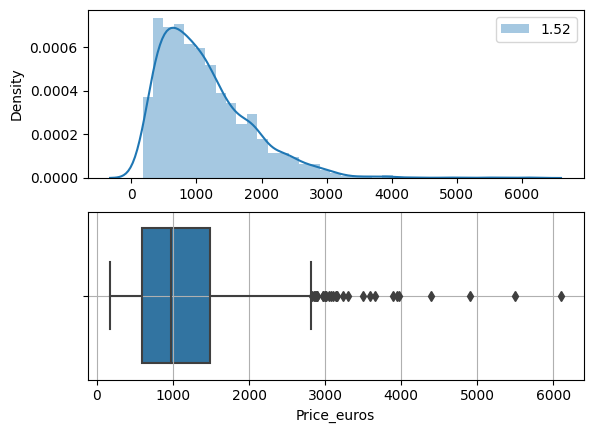

In [484]:
plt.subplot(2,1,1)
sns.distplot(x=df['Price_euros'],label=df['Price_euros'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Price_euros'])
plt.grid()

In [485]:
df['Price_euros'] = np.where(df['Price_euros']>2820,df['Price_euros'].median(),df['Price_euros'])

<Axes: xlabel='Screen_W'>

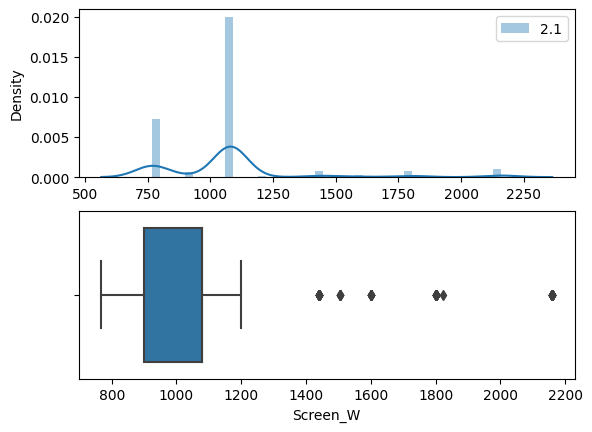

In [486]:
plt.subplot(2,1,1)
sns.distplot(x=df['Screen_W'],label=df['Screen_W'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Screen_W'])

In [487]:
df['Screen_W'] = np.where(df['Screen_W']>1200,df['Screen_W'].median(),df['Screen_W'])

<Axes: xlabel='Screen_L'>

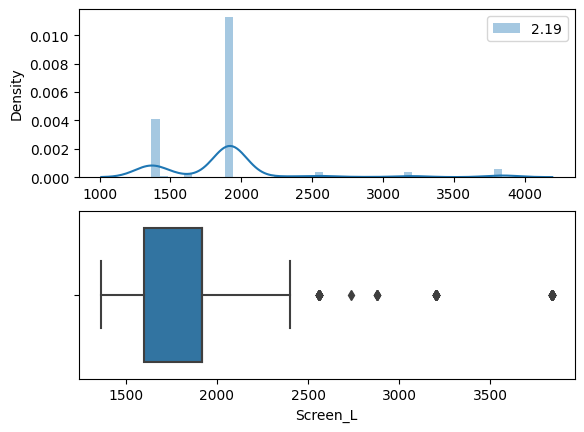

In [488]:
plt.subplot(2,1,1)
sns.distplot(x=df['Screen_L'],label=df['Screen_L'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Screen_L'])

In [489]:
df['Screen_L'] = np.where(df['Screen_L']>2500,df['Screen_L'].median(),df['Screen_L'])

<Axes: xlabel='Memory_Size'>

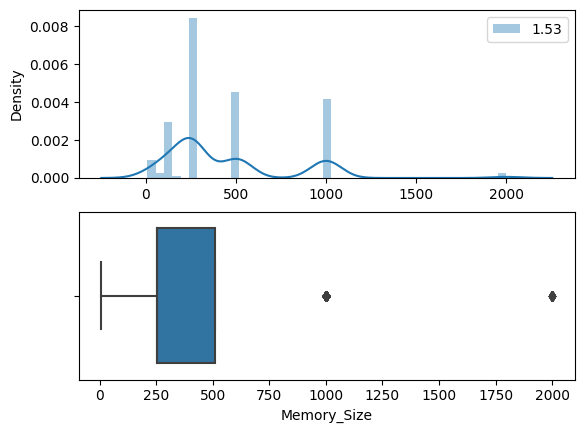

In [490]:
plt.subplot(2,1,1)
sns.distplot(x=df['Memory_Size'],label=df['Memory_Size'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Memory_Size'])

In [491]:
df['Memory_Size'] = np.where(df['Memory_Size']>500,df['Memory_Size'].median(),df['Memory_Size'])

<Axes: xlabel='Cpu_Memory'>

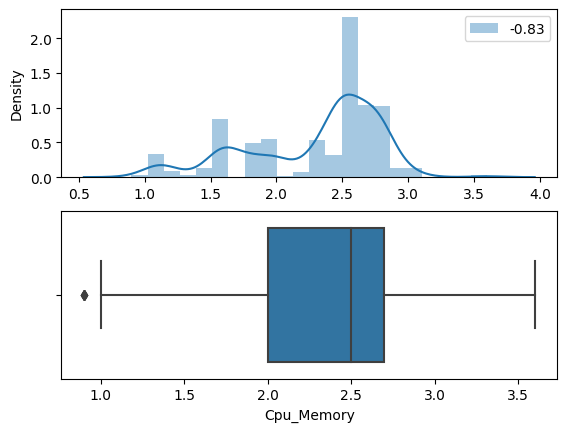

In [492]:
plt.subplot(2,1,1)
sns.distplot(x=df['Cpu_Memory'],label=df['Cpu_Memory'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Cpu_Memory'])

<Axes: xlabel='Weight'>

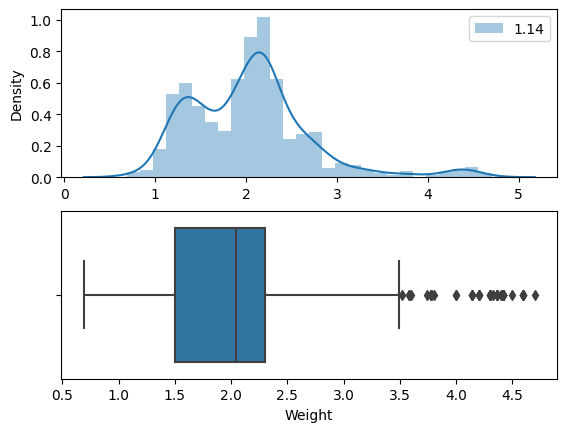

In [493]:
plt.subplot(2,1,1)
sns.distplot(x=df['Weight'],label=df['Weight'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Weight'])

In [494]:
df['Weight'] = np.where(df['Weight']>3.5,df['Weight'].median(),df['Weight'])

<Axes: xlabel='Ram'>

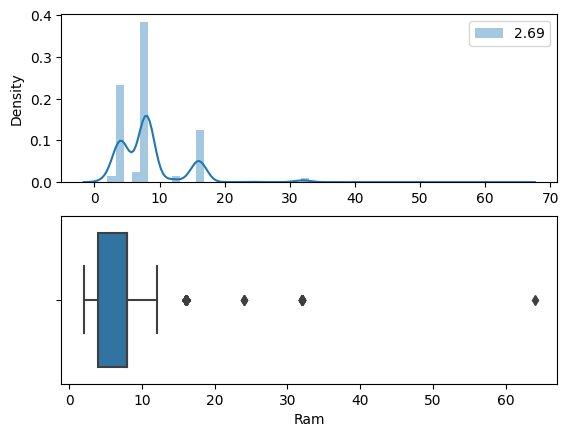

In [495]:
plt.subplot(2,1,1)
sns.distplot(x=df['Ram'],label=df['Ram'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Ram'])

In [496]:
df['Ram'] = np.where(df['Ram']>14,df['Ram'].median(),df['Ram'])

<Axes: xlabel='Inches'>

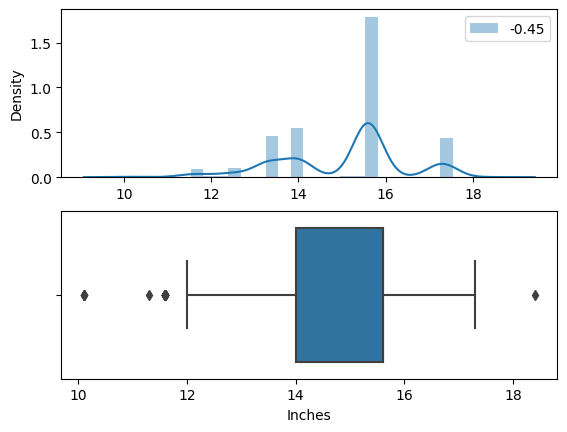

In [497]:
plt.subplot(2,1,1)
sns.distplot(x=df['Inches'],label=df['Inches'].skew().round(2))
plt.legend()
plt.subplot(2,1,2)
sns.boxplot(x=df['Inches'])

In [498]:
df['Inches'] = np.where(~df['Inches'].between(12,18),df['Inches'].median(),df['Inches'])

In [499]:
X = df.drop(['Price_euros'],axis=1)

y = df['Price_euros']

In [500]:
# np.shfshfb(fnfj)

Correlation Matrix

<Axes: >

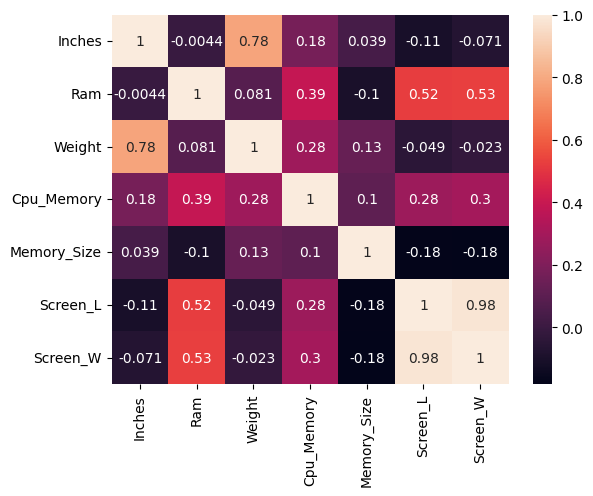

In [501]:
corr_x = X.select_dtypes(exclude="object").corr()

sns.heatmap(corr_x,annot=True)

In [502]:
def correlation(data,threshold):
    corr_col = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j]) > threshold:
                corr_col.add(corr_mat.columns[i])
    return corr_col

In [503]:
corr_08 = correlation(X.select_dtypes(exclude="object"),0.8)

corr_08

{'Screen_W'}

In [504]:
corr_75 = correlation(X.select_dtypes(exclude="object"),0.75)

corr_75

{'Screen_W', 'Weight'}

In [505]:
X.drop(['Screen_W','Weight'],axis=1,inplace=True)

Variance Threshold

In [506]:
var_thresh = VarianceThreshold(threshold=0)

var_thresh.fit(X.select_dtypes(exclude="object"),y)

var_thresh.get_feature_names_out()

array(['Inches', 'Ram', 'Cpu_Memory', 'Memory_Size', 'Screen_L'],
      dtype=object)

In [507]:
X.select_dtypes(exclude="object").columns

Index(['Inches', 'Ram', 'Cpu_Memory', 'Memory_Size', 'Screen_L'], dtype='object')

In [508]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   float64
 4   OpSys        1303 non-null   object 
 5   Cpu_brand    1303 non-null   object 
 6   Cpu_Memory   1303 non-null   float64
 7   Gpu_brand    1303 non-null   object 
 8   ScreenLW     1303 non-null   object 
 9   Memory_Size  1303 non-null   float64
 10  Memory_Type  1303 non-null   object 
 11  Screen_L     1303 non-null   float64
dtypes: float64(5), object(7)
memory usage: 122.3+ KB


In [509]:
num_col = X.columns.get_indexer_for(X.select_dtypes(exclude="object").columns).tolist()

cat_col = X.columns.get_indexer_for(X.select_dtypes(include="object").columns).tolist()

In [510]:
print(num_col)
print(cat_col)

[2, 3, 6, 9, 11]
[0, 1, 4, 5, 7, 8, 10]


Creating a pipeline

In [511]:
pipe1 = ColumnTransformer([
    ("simple_num",SimpleImputer(strategy="median"),num_col),
    ("simple_cat",SimpleImputer(strategy="most_frequent"),cat_col)
])

pipe2 = ColumnTransformer([
    ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore"),cat_col)
])

pipe3 = ColumnTransformer([
    ("minmax",MinMaxScaler(),num_col)
])

pipe4 = SelectKBest(score_func=mutual_info_regression,k=5)

pipe5 = PCA(n_components=5)

In [512]:
alpha1= 0.2
l1_ratio1 = 0.4

pipe6 = ElasticNet(alpha=alpha1,l1_ratio=l1_ratio1)

In [513]:
pipeline_eln = Pipeline([
    ("pipe1",pipe1),
    ("pipe2",pipe2),
    ("pipe3",pipe3),
    ("pipe4",pipe4),
    ("pipe5",pipe5),
    ("pipe6",pipe6),
])

In [514]:
pipeline_eln

Pipeline(steps=[('pipe1',
                 ColumnTransformer(transformers=[('simple_num',
                                                  SimpleImputer(strategy='median'),
                                                  [2, 3, 6, 9, 11]),
                                                 ('simple_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 4, 5, 7, 8, 10])])),
                ('pipe2',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 4, 5, 7, 8, 10])])),
                ('pipe3',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  [2, 3, 6, 9, 11])])),
                ('pipe4',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_regression at 0x0000017C33CFFD80>)),
                ('pipe5', PCA(n_components=5)),
                ('pipe6', ElasticNet(alpha=0.2, l1_ratio=0.4))])

In [515]:
x_train ,x_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [516]:
with mlflow.start_run(nested=True):

    model_config = {
    # other configuration options...
    'protected_namespaces': ()}

    # Set the protected namespaces
    model_config['protected_namespaces'] = ()

    pipeline_eln.fit(x_train,y_train)

    mlflow.log_text("Shubham","Author")
    mlflow.log_text("V1.2","Version")
    mlflow.log_text("ElasticNet","Model")

    mlflow.sklearn.log_model(pipeline_eln,"ElasticNet")

    mlflow.log_param("alpha",alpha1)
    mlflow.log_param("l1_ratio",l1_ratio1)

    y_pred = pipeline_eln.predict(x_test)

    mlflow.log_metric("mae",mean_absolute_error(y_test,y_pred).round(3))
    mlflow.log_metric("mse",mean_squared_error(y_test,y_pred).round(3))
    mlflow.log_metric("rmse",np.sqrt(mean_squared_error(y_test,y_pred)).round(3))
    mlflow.log_metric("r2_score",r2_score(y_test,y_pred).round(3))

    mlflow.autolog()

mlflow.end_run()

2024/01/04 14:46:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/01/04 14:46:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


In [517]:
selected_feature_indices = pipeline_eln.named_steps['pipe4'].get_support(indices=True)

# Get the names of the selected features
selected_feature_names = x_train.columns[selected_feature_indices]

print("Selected feature indices:", selected_feature_indices)
print("Selected feature names:", selected_feature_names)

Selected feature indices: [0 1 2 3 4]
Selected feature names: Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys'], dtype='object')


In [518]:
x_train.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Cpu_brand',
       'Cpu_Memory', 'Gpu_brand', 'ScreenLW', 'Memory_Size', 'Memory_Type',
       'Screen_L'],
      dtype='object')

<Axes: xlabel='Price_euros'>

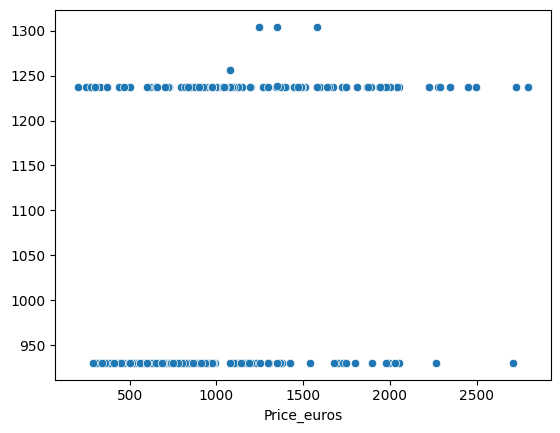

In [519]:
sns.scatterplot(x=y_test,y=y_pred)

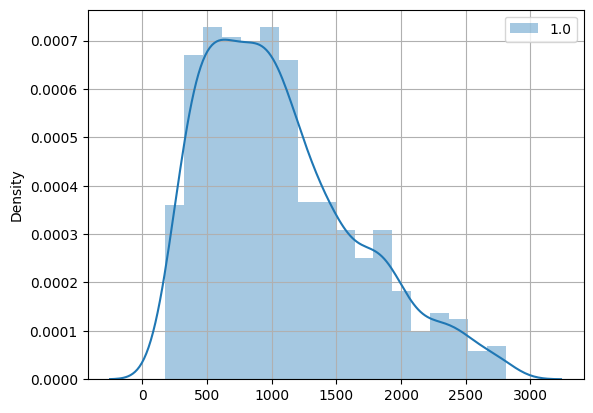

In [520]:
sns.distplot(x=df['Price_euros'],label=df['Price_euros'].skew().round())
plt.legend()
plt.grid()
plt.show()

In [5]:
df['Company'].unique()

NameError: name 'df' is not defined

<Axes: xlabel='Company'>

<Figure size 1500x500 with 0 Axes>

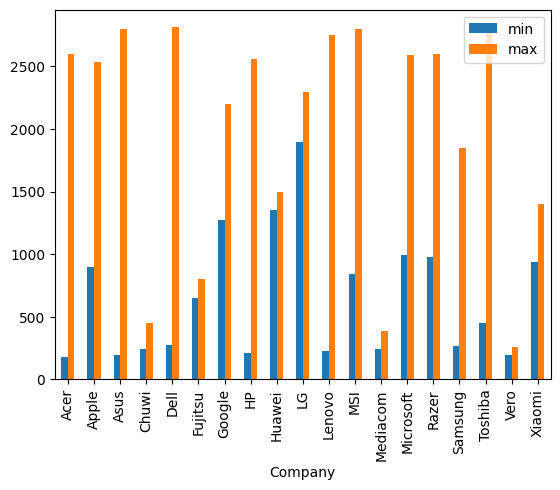

In [525]:
plt.figure(figsize=[15,5])
df.groupby('Company')['Price_euros'].agg(['min','max']).plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price_euros'>

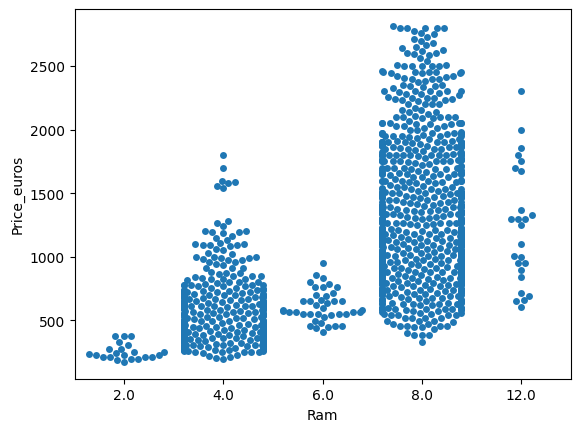

In [526]:
sns.swarmplot(x=df['Ram'],y=df['Price_euros'])

<Axes: xlabel='Ram', ylabel='Price_euros'>

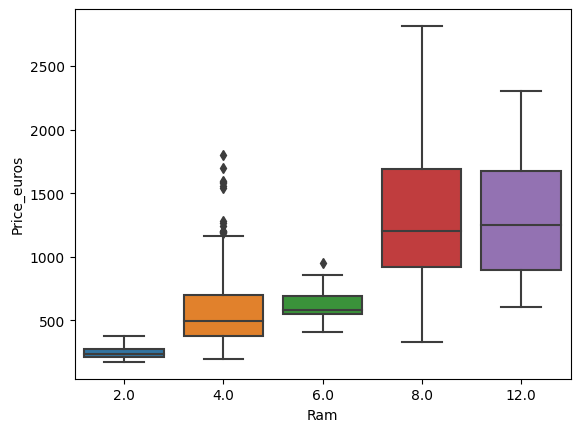

In [527]:
sns.boxplot(x=df['Ram'],y=df['Price_euros'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

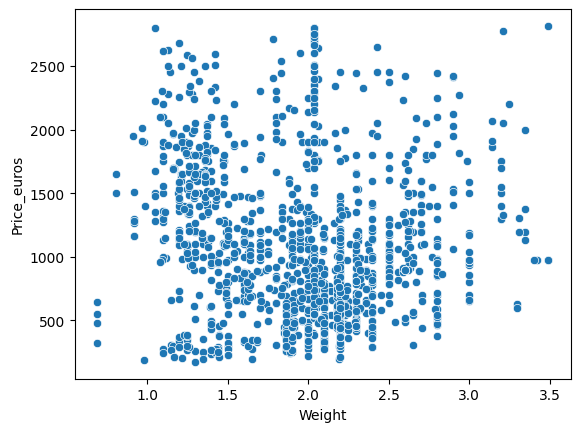

In [529]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [2]:
import pickle